In [2]:
#cd /content/drive/MyDrive/기계학습 과제/팀플

In [4]:
# basic imports
import numpy as np
import pandas as pd
import os

In [5]:
# initialising the train dataset into a dataframe
traindataset = pd.read_csv("./train.csv")
train = traindataset[:5000]

In [6]:
# initialising the test dataset into a dataframe
testdataset = pd.read_csv("./test.csv")
test = testdataset[:5000]

In [7]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# pre-processing #
train.drop(["id", "keyword", "location"], axis = 1)
#test.drop(["id", "keyword", "location"], axis = 1)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
4995,We're #hiring! Read about our latest #job open...,0
4996,Courageous and honest analysis of need to use ...,1
4997,13 reasons why we love women in the military ...,0
4998,Listen LIve: http://t.co/1puLaekxcq #Author #I...,0


In [8]:
# download stopwords and punkt from nltk
import nltk

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dogemorris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dogemorris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# performing basic pre-processing on the Corpus
import re
import string
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.PorterStemmer()

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100

traindataset['body_len'] = traindataset['text'].apply(lambda x: len(x) - x.count(" "))
traindataset['punct%'] = traindataset['text'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [stemmer.stem(word) for word in tokens if word not in stopwords]
  return text

In [10]:
# creating Train, Test and Split Datasets
from sklearn.model_selection import train_test_split

X = traindataset[['text', 'body_len', 'punct%']]
y = traindataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# vectorising the Corpus using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=5000)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect_fit.get_feature_names_out())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True),
                         pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vect_fit.get_feature_names_out())], axis=1)
X_train_vect.head()

,body_len,punct%,,0,0104,010401,015025,05,06,06jst,...,ûïrichmond,ûïstretcher,ûïthe,ûïthehighfess,ûïwe,ûïwhen,ûò,ûó,ûóbbc,ûóher
0,120,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,76,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,113,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# importing necessary packages from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Finish preprocess

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import timeit

Exp1

In [15]:
from sklearn import random
pipe = Pipeline(steps=[('rf', RandomForestClassifier(max_depth=None, n_jobs=-1),)])
parameters = {'rf__n_estimators':[10,50,150,450,750,1000]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rf__n_estimators': [10, 50, 150, 450, 750, 1000]})

In [17]:
# print best parameters after grid search
print(grid.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'rf__n_estimators': 450}
Pipeline(steps=[('rf', RandomForestClassifier(n_estimators=450, n_jobs=-1))])


accuracy on test dataset: 0.7972854640980735
Precision: 0.824 / Recall: 0.663 / F1-Score: 0.734 / Accuracy: 0.797


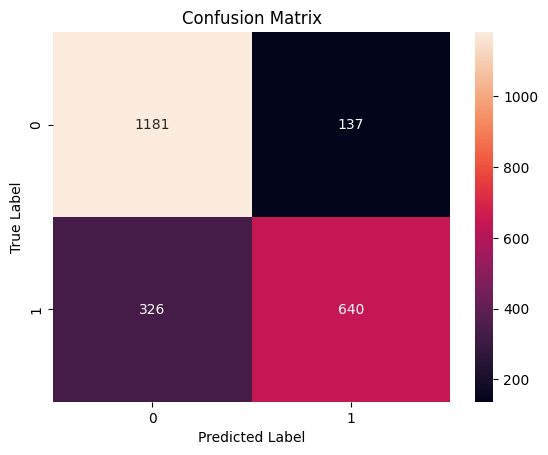

In [18]:
from sklearn.metrics import accuracy_score
y_pred = grid.predict(X_test_vect)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(y_test, y_pred), 3)))

# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
importances = grid.best_estimator_._final_estimator.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(10):
  print("{}. feature {} ({:.3f})".format(f + 1, X_train_vect.columns[indices[f]], importances[indices[f]]))

1. feature body_len (0.034)
2. feature punct% (0.029)
3. feature fire (0.013)
4. feature hiroshima (0.008)
5. feature flood (0.007)
6. feature kill (0.007)
7. feature bomb (0.007)
8. feature california (0.006)
9. feature suicid (0.006)
10. feature disast (0.005)


Exp2

In [20]:
from sklearn.decomposition import PCA
pipe = Pipeline(steps=[('pca', PCA()),('rf', RandomForestClassifier(max_depth=None, n_jobs=-1),),])
parameters = {'pca__n_components':[2,5,10,20], 'rf__n_estimators':[150,450,750,1000]}
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'pca__n_components': [2, 5, 10],
                         'rf__n_estimators': [10, 50, 150, 450, 750, 1000]})

In [21]:
print(grid.best_params_)
print(grid.best_estimator_)

{'pca__n_components': 10, 'rf__n_estimators': 750}
Pipeline(steps=[('pca', PCA(n_components=10)),
                ('rf', RandomForestClassifier(n_estimators=750, n_jobs=-1))])


accuracy on test dataset: 0.7521891418563923
Precision: 0.754 / Recall: 0.615 / F1-Score: 0.677 / Accuracy: 0.752


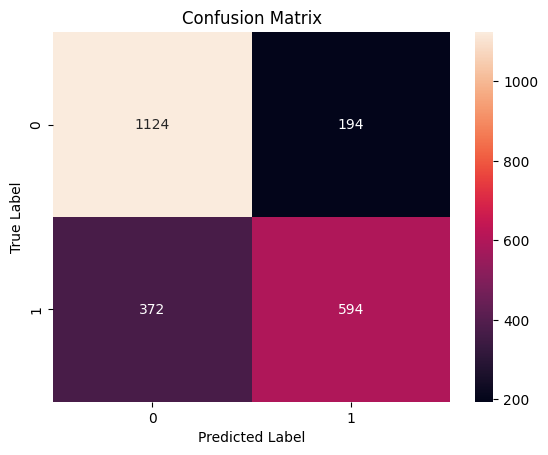

In [22]:
y_pred = grid.predict(X_test_vect)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(y_test, y_pred), 3)))

# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
importances = grid.best_estimator_._final_estimator.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(10):
  print("{}. feature {} ({:.3f})".format(f + 1, X_train_vect.columns[indices[f]], importances[indices[f]]))

1. feature body_len (0.131)
2. feature 0 (0.128)
3. feature 0104 (0.117)
4. feature  (0.096)
5. feature punct% (0.094)
6. feature 06 (0.090)
7. feature 06jst (0.089)
8. feature 010401 (0.089)
9. feature 015025 (0.085)
10. feature 05 (0.082)


Exp3

In [ ]:
pipe = Pipeline(steps=[('pca', PCA()),('clf', KNeighborsClassifier()),])
parameters = {'pca__n_components':[2,5,10], 'clf__n_neighbors':[5,10,15]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=5)

grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]})

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'clf__n_neighbors': 10, 'pca__n_components': 5}
Pipeline(steps=[('pca', PCA(n_components=5)),
                ('clf', KNeighborsClassifier(n_neighbors=10))])


accuracy on test dataset: 0.6120840630472855
Precision: 0.565 / Recall: 0.358 / F1-Score: 0.439 / Accuracy: 0.612


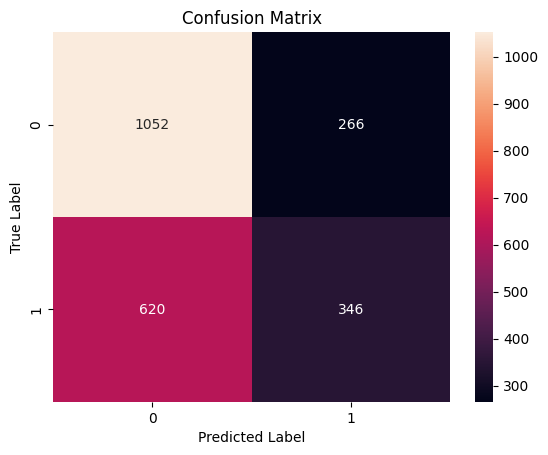

In [ ]:
y_pred = grid.predict(X_test_vect)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(y_test, y_pred), 3)))

# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

KNN Classifier has no feature importance

Exp4

In [36]:
from sklearn import svm
pipe = Pipeline(steps=[('pca', PCA()),('clf', svm.SVC()),])
parameters = {'pca__n_components':[2,5,10], 'clf__C':[0.1,1,10,100,1000], 'clf__gamma':[1,0.1,0.01,0.001,0.0001]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10, 100, 1000],
                         'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'pca__n_components': [2, 5, 10]})

In [37]:
print(grid.best_params_)
print(grid.best_estimator_)

{'clf__C': 1000, 'clf__gamma': 0.01, 'pca__n_components': 10}
Pipeline(steps=[('pca', PCA(n_components=10)),
                ('clf', SVC(C=1000, gamma=0.01))])


accuracy on test dataset: 0.6891418563922942
Precision: 0.671 / Recall: 0.52 / F1-Score: 0.586 / Accuracy: 0.689


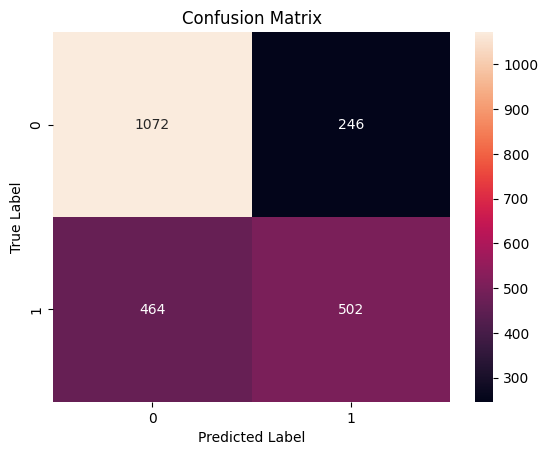

In [38]:
y_pred = grid.predict(X_test_vect)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(y_test, y_pred), 3)))

# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM has no feature importance